# Visualize Results


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image, ImageFile

In [14]:
snoq = glob.glob('/Volumes/CatBreen/CV4ecology/snoq/**/*')
olympex = glob.glob('/Volumes/CatBreen/CV4ecology/olympex/**/*')
scandcam = glob.glob('/Volumes/CatBreen/CV4ecology/scandcam/**/*')

In [39]:
all_paths = snoq+olympex+scandcam

In [41]:
all_files = [file.split('/')[-1] for file in all_paths]

In [157]:
paths = pd.DataFrame({'all_paths':all_paths,'all_files':all_files})
paths.head()

,all_paths,all_files
0,/Volumes/CatBreen/CV4ecology/snoq/Rain/2014_12...,2014_12_02_12_00_00.jpg
1,/Volumes/CatBreen/CV4ecology/snoq/Rain/2014_10...,2014_10_18_13_01_00.jpg
2,/Volumes/CatBreen/CV4ecology/snoq/Rain/2014_10...,2014_10_22_12_00_00.jpg
3,/Volumes/CatBreen/CV4ecology/snoq/Rain/2014_11...,2014_11_27_13_01_00.jpg
4,/Volumes/CatBreen/CV4ecology/snoq/Rain/2014_12...,2014_12_11_08_00_00.jpg


## load result csvs for the best experiments

In [136]:
#results = pd.read_csv('/Users/cmbreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_3classes_seqSliding/figs/results.csv')
class2_none = pd.read_csv('/Users/cmbreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_2classes_None/resultsTEST.csv')
class2_none = class2_none[['filenames', 'trueLabels','predictedLabels', 'confidences']]
class2_none.head()


,filenames,trueLabels,predictedLabels,confidences
0,896_20181227 (51).JPG,1,1,0.918138
1,874_20190111 (611).JPG,1,0,0.094495
2,982_20181206 (4906).JPG,1,1,0.584488
3,657_20190330 (8).JPG,1,1,0.999630
4,1119_20190530 (420).JPG,1,0,0.002408


## Find places that they don't match

We will do this by indices

In [164]:
def mismatchFiles(results, paths):
### remove matches 
    indices = []
    for idx, trueLabel in enumerate(results['trueLabels']):
        if trueLabel == results['predictedLabels'][idx]: indices.append(idx)

    #results[results['confidences'] > 0.90]
    mismatch = results.drop(indices)

    mismatch = results.drop(indices)
    df = mismatch.sort_values(by=['confidences'], ascending=False).reset_index()    #[mismatch['confidences'] > 0.95].reset_index()
    df = df.rename(columns={"Unnamed: 0": "index"})

    df1 = df.merge(paths, left_on='filenames', right_on="all_files")
    

    return df1

In [165]:
mismatch = mismatchFiles(class2_none,paths)  ## 68 files that are rain that are NOT rain
mismatch.head()

,index,filenames,trueLabels,predictedLabels,confidences,all_paths,all_files
0,3068,831_20190123 (101).JPG,0,1,0.999669,/Volumes/CatBreen/CV4ecology/scandcam/None/831...,831_20190123 (101).JPG
1,3066,831_20190123 (100).JPG,0,1,0.998995,/Volumes/CatBreen/CV4ecology/scandcam/None/831...,831_20190123 (100).JPG
2,3135,870_20181201 (178).JPG,0,1,0.998579,/Volumes/CatBreen/CV4ecology/scandcam/None/870...,870_20181201 (178).JPG
3,2547,433_20190111 (193).JPG,0,1,0.997596,/Volumes/CatBreen/CV4ecology/scandcam/None/433...,433_20190111 (193).JPG
4,2921,711_20181129 (157).JPG,0,1,0.996544,/Volumes/CatBreen/CV4ecology/scandcam/None/711...,711_20181129 (157).JPG


(-0.5, 2047.5, 1535.5, -0.5)

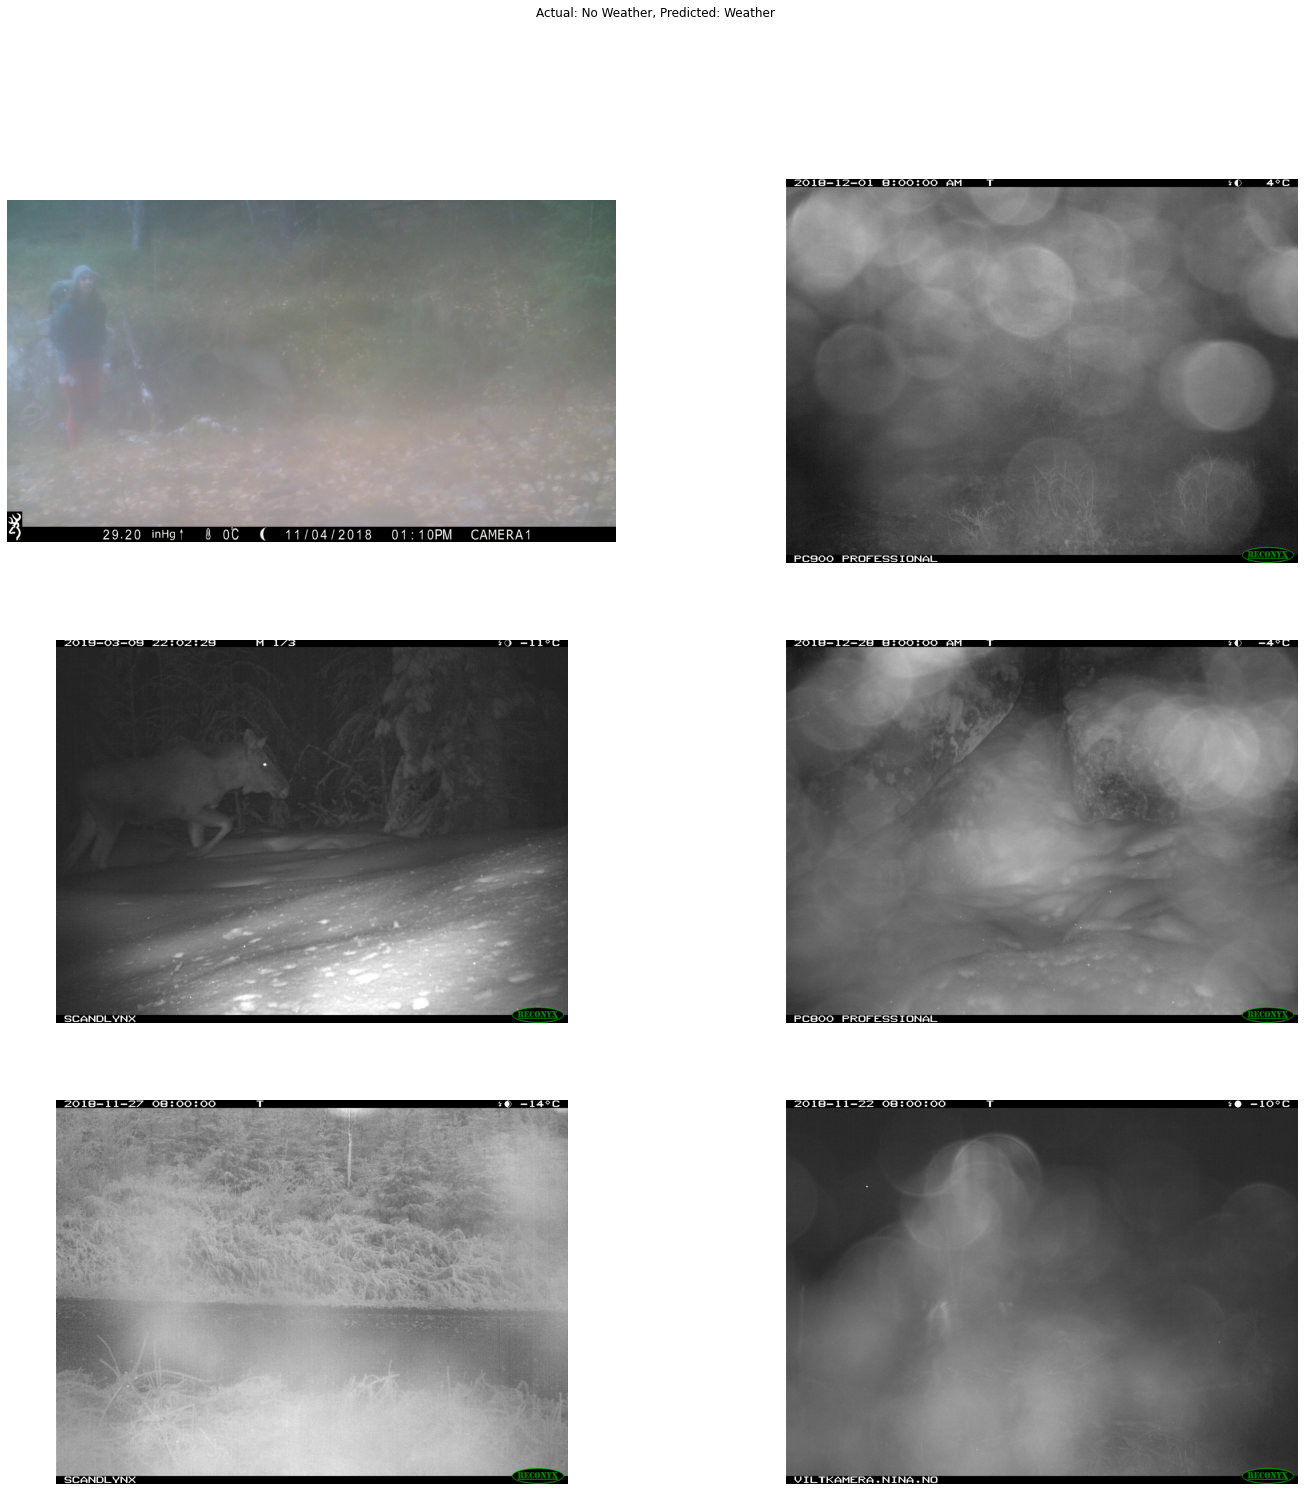

In [197]:
#mismatch['index'][0]
top1 = Image.open(mismatch['all_paths'][1])
top2 = Image.open(mismatch['all_paths'][13])
top3 = Image.open(mismatch['all_paths'][17])
top4 = Image.open(mismatch['all_paths'][3])
top5 = Image.open(mismatch['all_paths'][4])
top6 = Image.open(mismatch['all_paths'][5])

fig, axs = plt.subplots(3, 2, figsize=(24, 24))
fig.suptitle('Actual: No Weather, Predicted: Weather')
axs[0, 0].imshow(top1)
axs[0, 0].axis('off')
axs[0, 1].imshow(top2)
axs[0, 1].axis('off')
axs[1, 0].imshow(top3)
axs[1, 0].axis('off')
axs[1, 1].imshow(top4)
axs[1, 1].axis('off')
axs[2, 0].imshow(top5)
axs[2, 0].axis('off')
axs[2, 1].imshow(top6)
axs[2, 1].axis('off')



## Visualize Results

In [176]:
mismatch.tail()

,index,filenames,trueLabels,predictedLabels,confidences,all_paths,all_files
281,180,1120_20190723 (579).JPG,1,0,8.110264e-06,/Volumes/CatBreen/CV4ecology/scandcam/Snow/112...,1120_20190723 (579).JPG
282,36,1119_20190530 (429).JPG,1,0,6.192612e-06,/Volumes/CatBreen/CV4ecology/scandcam/Rain/111...,1119_20190530 (429).JPG
283,23,1521_20190604 (118).JPG,1,0,2.705877e-06,/Volumes/CatBreen/CV4ecology/scandcam/Rain/152...,1521_20190604 (118).JPG
284,212,1374_20190606 (10).JPG,1,0,2.125648e-06,/Volumes/CatBreen/CV4ecology/scandcam/Snow/137...,1374_20190606 (10).JPG
285,14,334_20181015 (379).JPG,1,0,8.998664e-07,/Volumes/CatBreen/CV4ecology/scandcam/Rain/334...,334_20181015 (379).JPG


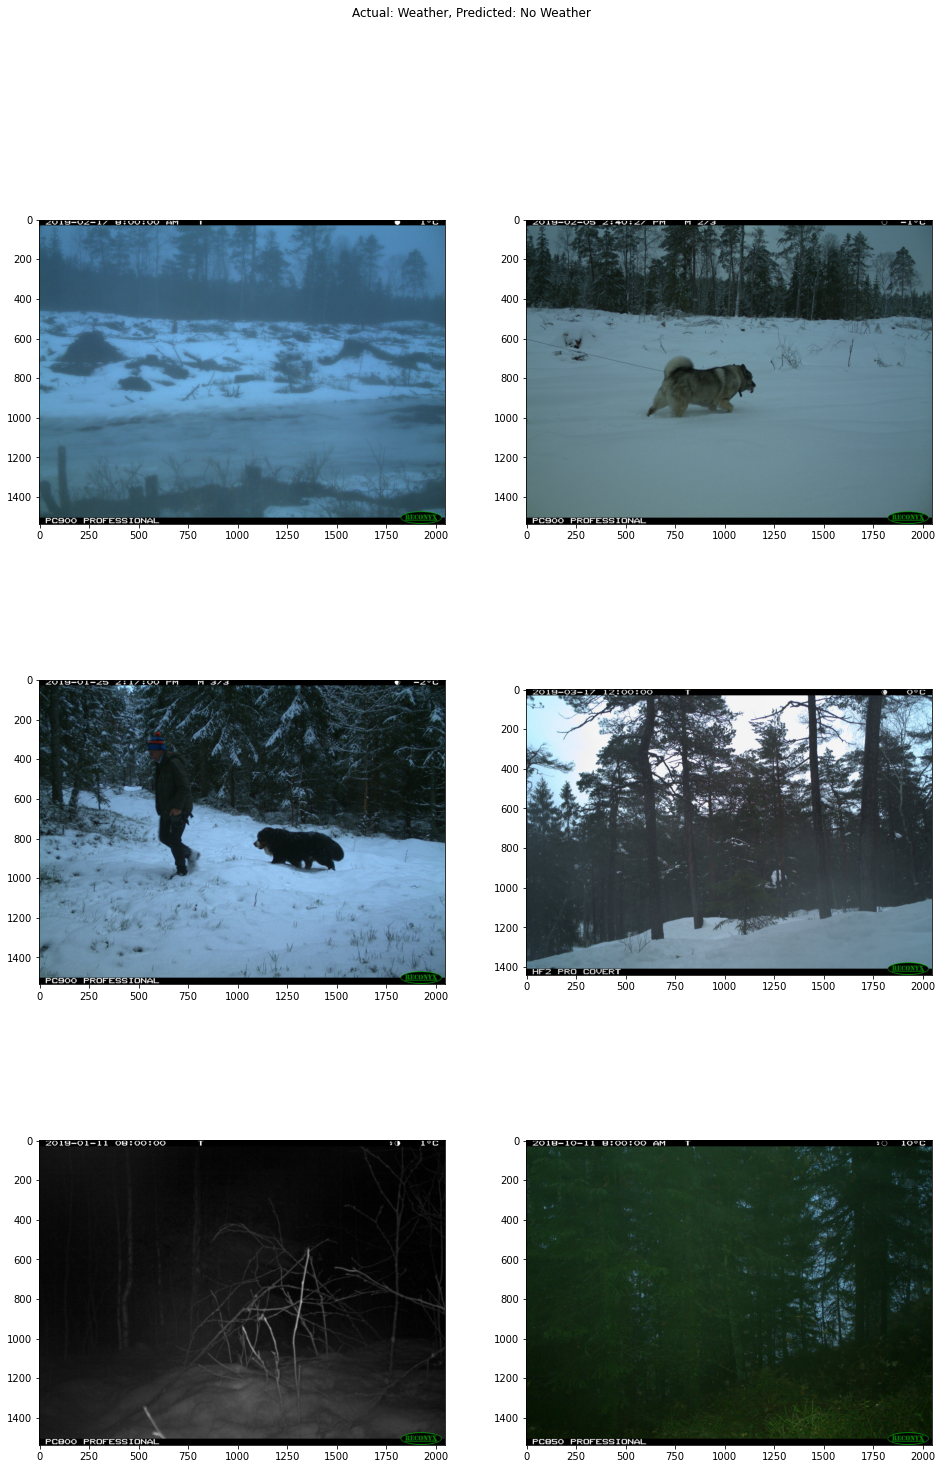

In [198]:
mismatch.tail()
#mismatch['index'][0]
bottom1 = Image.open(mismatch['all_paths'][len(mismatch)-6])
bottom2 = Image.open(mismatch['all_paths'][len(mismatch)-5])
bottom3 = Image.open(mismatch['all_paths'][len(mismatch)-4])
bottom4 = Image.open(mismatch['all_paths'][len(mismatch)-3])
bottom5 = Image.open(mismatch['all_paths'][len(mismatch)-2])
bottom6 = Image.open(mismatch['all_paths'][len(mismatch)-1])

fig, axs = plt.subplots(3, 2, figsize=(16, 24))
fig.suptitle('Actual: Weather, Predicted: No Weather')
axs[0, 0].imshow(bottom1)
axs[0, 1].imshow(bottom2)
axs[1, 0].imshow(bottom3)
axs[1, 1].imshow(bottom4)
axs[2, 0].imshow(bottom5)
axs[2, 1].imshow(bottom6)


286